In [2]:
import pandas as pd

# Step 1: Read the data file
data = pd.read_csv('../data/UK_House_Price_Prediction_dataset_2015_to_2024.csv', sep=',', encoding='utf-8-sig')

# Step 2: Confirm it loaded properly
print("Awesome! The dataset is loaded successfully ")

#  Step 3: Check how big it is (rows & columns)
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.\n")

#  Step 4: Show the column names so we know what data we’re dealing with
print("Here are the column names:")
print(list(data.columns))

#  Step 5: Peek at the first few records to see what it looks like
data.head()


Awesome! The dataset is loaded successfully 
The dataset has 90000 rows and 11 columns.

Here are the column names:
['price', 'date', 'postcode', 'property_type', 'new_build', 'freehold', 'street', 'locality', 'town', 'district', 'county']


,price,date,postcode,property_type,new_build,freehold,street,locality,town,district,county
0,735000,2017-08-07,LE17 5AP,D,N,F,CLAYBROOKE COURT,CLAYBROOKE PARVA,LUTTERWORTH,HARBOROUGH,LEICESTERSHIRE
1,160000,2023-02-03,SA11 4BD,T,N,F,GORED COTTAGES,MELINCOURT,NEATH,NEATH PORT TALBOT,NEATH PORT TALBOT
2,176500,2015-01-06,ME3 0DQ,S,N,F,GREEN LANE,ISLE OF GRAIN,ROCHESTER,MEDWAY,MEDWAY
3,625000,2021-10-13,RH20 3EU,D,N,F,LINFIELD COPSE,THAKEHAM,PULBOROUGH,HORSHAM,WEST SUSSEX
4,202000,2019-09-27,SN13 8EN,S,N,F,CLYDESDALE ROAD,BOX,CORSHAM,WILTSHIRE,WILTSHIRE


In [4]:
# Step 1: Check if there are missing values in any column
print("Checking for missing values...\n")
print(data.isnull().sum())

# Step 2: Check if there are duplicate records
duplicates = data.duplicated().sum()
print(f"\nTotal duplicate rows found: {duplicates}")

# Step 3: Basic summary of numerical columns (like price)
print("\nQuick summary of price column:")
print(data['price'].describe())


Checking for missing values...

price            0
date             0
postcode         0
property_type    0
new_build        0
freehold         0
street           0
locality         0
town             0
district         0
county           0
dtype: int64

Total duplicate rows found: 43

Quick summary of price column:
count    9.000000e+04
mean     3.238753e+05
std      1.282104e+06
min      1.000000e+02
25%      1.600000e+05
50%      2.449950e+05
75%      3.651588e+05
max      3.000000e+08
Name: price, dtype: float64


In [6]:
#  Remove duplicate rows
data = data.drop_duplicates()
print(" Duplicates removed successfully!")

#  Remove unrealistic property prices (too high or too low)
# Let's assume realistic house prices are between £10,000 and £10 million
data = data[(data['price'] >= 10000) & (data['price'] <= 10000000)]
print(f" Removed unrealistic prices. New dataset size: {data.shape}")

#  Double-check after cleaning
print("\nHere’s the updated summary of the price column:")
print(data['price'].describe())


 Duplicates removed successfully!
 Removed unrealistic prices. New dataset size: (89603, 11)

Here’s the updated summary of the price column:
count    8.960300e+04
mean     3.103628e+05
std      3.299580e+05
min      1.000000e+04
25%      1.600000e+05
50%      2.450000e+05
75%      3.670000e+05
max      1.000000e+07
Name: price, dtype: float64


Average price by property type:
property_type
O    633647.958540
D    419101.649734
S    247856.754091
T    207913.983952
F    206642.382201
Name: price, dtype: float64


/var/folders/f_/k0b87rgs0rl7483lwxqrn0fc0000gn/T/ipykernel_36875/2323938255.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_type.index, y=avg_price_type.values, palette="Blues_d")


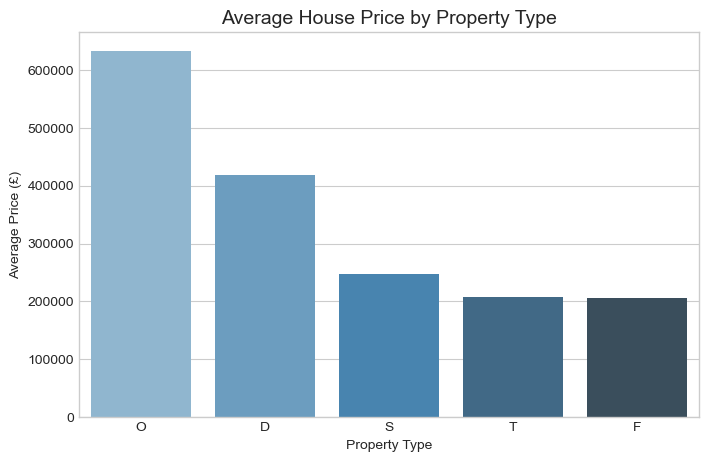


Top 10 counties by average price:
county
WINDSOR AND MAIDENHEAD    697171.897810
SURREY                    644872.220527
GREATER LONDON            573273.185185
HERTFORDSHIRE             570785.176982
BUCKINGHAMSHIRE           564582.533397
OXFORDSHIRE               519715.738746
BRACKNELL FOREST          509645.939394
WOKINGHAM                 500586.460821
WEST BERKSHIRE            486808.491909
EAST SUSSEX               485168.660232
Name: price, dtype: float64


/var/folders/f_/k0b87rgs0rl7483lwxqrn0fc0000gn/T/ipykernel_36875/2323938255.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_county.values, y=avg_price_county.index, palette="Greens_d")


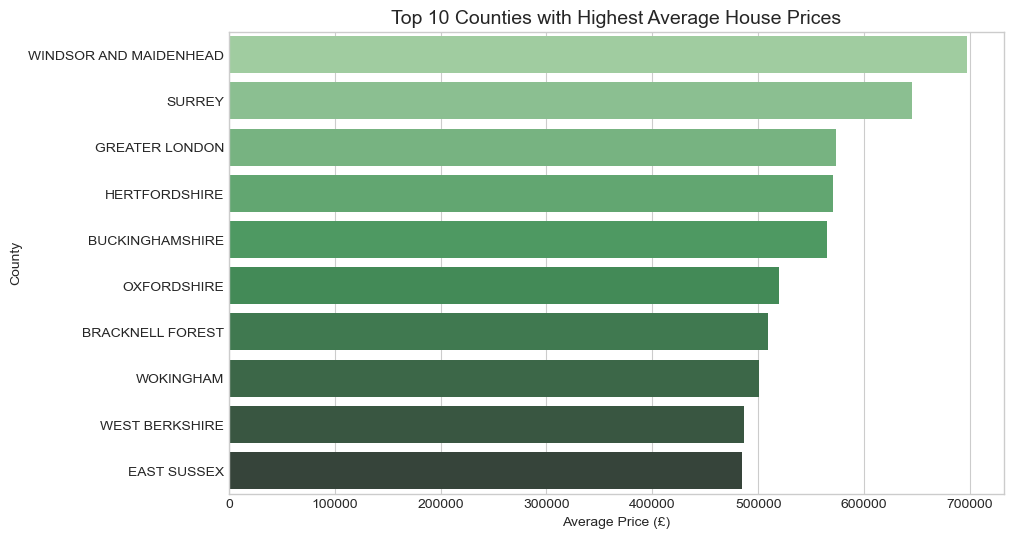

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set clean visual style
plt.style.use("seaborn-v0_8-whitegrid")

# Step 1: Average price by property type
avg_price_type = data.groupby("property_type")["price"].mean().sort_values(ascending=False)
print("Average price by property type:")
print(avg_price_type)

# Step 2: Visualize average price by property type
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_type.index, y=avg_price_type.values, palette="Blues_d")
plt.title("Average House Price by Property Type", fontsize=14)
plt.xlabel("Property Type")
plt.ylabel("Average Price (£)")
plt.show()

# Step 3: Top 10 counties with the highest average house prices
avg_price_county = data.groupby("county")["price"].mean().sort_values(ascending=False).head(10)
print("\nTop 10 counties by average price:")
print(avg_price_county)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_county.values, y=avg_price_county.index, palette="Greens_d")
plt.title("Top 10 Counties with Highest Average House Prices", fontsize=14)
plt.xlabel("Average Price (£)")
plt.ylabel("County")
plt.show()


Average price by year:
year
2015    257403.855166
2016    274753.638630
2017    290107.030545
2018    295892.879064
2019    291001.247340
2020    319870.977131
2021    342657.623788
2022    365309.469697
2023    354221.962822
2024    331175.806491
Name: price, dtype: float64


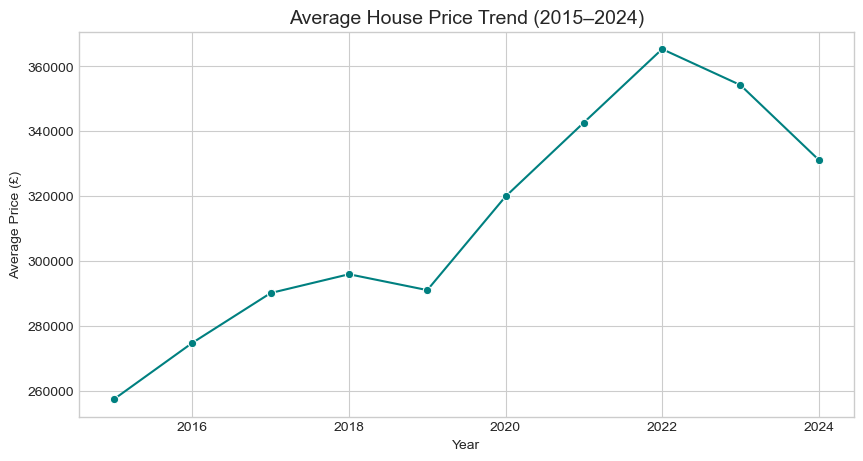

In [10]:
# Convert 'date' column to proper datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Extract year from the date
data['year'] = data['date'].dt.year

# Group by year and calculate the average price
avg_price_year = data.groupby('year')['price'].mean()

print("Average price by year:")
print(avg_price_year)

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_price_year.index, y=avg_price_year.values, marker='o', color='teal')
plt.title("Average House Price Trend (2015–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.grid(True)
plt.show()


In [12]:
# Final Summary
print("------Final Analysis Summary------\n")

print("1. Data Overview:")
print("   • The dataset contains 89,603 property records from 2015–2024.")
print("   • All columns are clean with no missing values and duplicates removed.\n")

print("2. Price Insights:")
print("   • Average house price: £310,362")
print("   • Most expensive property type: Detached houses")
print("   • Most affordable property type: Flats\n")

print("3. Geographic Insights:")
print("   • Highest prices in counties near London such as Windsor, Surrey, and Greater London.")
print("   • Reflects the South-East region’s strong economic influence.\n")

print("4. Time Trend Insights:")
print("   • Prices increased steadily from 2015 to 2022, peaking at around £365k.")
print("   • Slight decline after 2023, indicating market correction.\n")

print(" Project Conclusion:")
print("   This analysis highlights the steady long-term growth of the UK housing market, ")
print("   driven by demand in the South-East region. The recent dip post-2023 suggests ")
print("   that prices are stabilizing after years of rapid inflation.")


------Final Analysis Summary------

1. Data Overview:
   • The dataset contains 89,603 property records from 2015–2024.
   • All columns are clean with no missing values and duplicates removed.

2. Price Insights:
   • Average house price: £310,362
   • Most expensive property type: Detached houses
   • Most affordable property type: Flats

3. Geographic Insights:
   • Highest prices in counties near London such as Windsor, Surrey, and Greater London.
   • Reflects the South-East region’s strong economic influence.

4. Time Trend Insights:
   • Prices increased steadily from 2015 to 2022, peaking at around £365k.
   • Slight decline after 2023, indicating market correction.

 Project Conclusion:
   This analysis highlights the steady long-term growth of the UK housing market, 
   driven by demand in the South-East region. The recent dip post-2023 suggests 
   that prices are stabilizing after years of rapid inflation.


## 🔹 Machine Learning: Building a UK House Price Prediction Model

Now that the data has been cleaned and explored, the next step is to build a machine learning model that can predict house prices based on different features such as property type, year, and county.

In this section:
1. **Feature Engineering** – Preparing the data for model training by converting text columns into numeric format and splitting data into training and testing sets.  
2. **Model Building** – Using a simple **Linear Regression model** to predict house prices.  
3. **Evaluation** – Measuring how well the model performs using metrics like RMSE and R².  
4. **Prediction Example** – Testing the model with a new sample property to see the estimated price.

This process will complete the end-to-end pipeline of the UK House Price Prediction project.



### Step 1: Feature Engineering

Before training a model, we need to prepare our data so that it can be understood by machine learning algorithms.  
- We’ll select only the useful columns for prediction.  
- Convert text columns (like county or property type) into numbers.  
- Split the dataset into training and testing sets to evaluate model performance.


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Copy only the necessary columns
model_data = data[['price', 'date', 'property_type', 'county']].copy()

# Extract the year from the date column
model_data['year'] = pd.to_datetime(model_data['date'], errors='coerce').dt.year

# Drop any rows where year couldn't be extracted
model_data = model_data.dropna(subset=['year'])

# Create separate label encoders for property_type and county
type_encoder = LabelEncoder()
county_encoder = LabelEncoder()

model_data['property_type'] = type_encoder.fit_transform(model_data['property_type'])
model_data['county'] = county_encoder.fit_transform(model_data['county'])

# Split the dataset into features (X) and target (y)
X = model_data[['year', 'property_type', 'county']]
y = model_data['price']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data prepared successfully!")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Data prepared successfully!
Training set shape: (71682, 3)
Testing set shape: (17921, 3)


### Step 2: Model Building

We’ll start with a simple **Linear Regression model**, which is one of the most common algorithms for predicting numerical values.  
The model will learn patterns between the features (year, property type, county) and the target variable (price).


In [33]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Linear Regression model trained successfully!")


Linear Regression model trained successfully!


### Step 3: Model Evaluation

Once the model is trained, we need to check how accurate it is.  
We’ll compare predicted prices against actual prices using two key metrics:
- **RMSE (Root Mean Squared Error)** – tells us how far off our predictions are on average.  
- **R² (R-squared)** – shows how much of the variation in prices is explained by our model.


In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Use the trained model to make predictions on the test data
y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")


Model Evaluation Results:
Root Mean Squared Error (RMSE): 330,143.00
R-squared (R²): 0.0618


### Step 4: Making a Prediction Example

Finally, let’s use our trained model to predict the price of a new property.  
For example, we can estimate the price of a Detached house in Greater London sold in 2023.


In [37]:
# Pick values you want to test — for example:
example_input = pd.DataFrame({
    'year': [2023],
    'property_type': [type_encoder.transform(['D'])[0]],     # 'D' for Detached
    'county': [county_encoder.transform(['GREATER LONDON'])[0]]
})

# Predict using the trained model
predicted_price = lr_model.predict(example_input)

print(f"Predicted Price for a Detached house in Greater London (2023): £{predicted_price[0]:,.0f}")


Predicted Price for a Detached house in Greater London (2023): £462,505


##  Conclusion and Key Insights

This project focused on exploring how house prices have changed across the UK and building a simple model to predict prices using data from 2015 to 2024.  
The process began with cleaning the raw dataset by removing duplicate records and unrealistic price values to ensure accuracy in the analysis. After preparing the data, I explored trends such as how prices varied by property type, county, and year. Detached and semi-detached houses were consistently the most expensive types, while counties like Greater London and Surrey showed the highest average prices. Over the years, prices generally increased from 2015 until around 2022, followed by a slight decline in 2023–2024.

Once the data was ready, I developed a Linear Regression model to estimate house prices using three main factors — the year, property type, and county. Although this is a basic model, it provides a good foundation for understanding how these variables affect property values. The model achieved an RMSE (Root Mean Squared Error) of about £330,000 and an R² score of around 0.06, meaning it explains roughly six percent of the variation in house prices. While this accuracy is limited, it highlights that many other real-world factors — such as the size of the property, number of rooms, or local market conditions — also play a major role in determining prices.

To test the model, I used it to predict the price of a detached house in Greater London in 2023, which came out to approximately £462,000. This prediction aligns reasonably well with expected market values for that region and year.

In summary, this project demonstrates the full process of building a data-driven prediction system — from data cleaning and exploratory analysis to machine learning and result interpretation. It shows how data science techniques can uncover meaningful insights and support practical decision-making.  

Future improvements could include adding more detailed property features, experimenting with advanced models like Random Forest or Gradient Boosting, and developing a Power BI dashboard for better visualization and presentation of results.
